In [55]:
import yfinance as yf
import pandas as pd

# Define stock list
stocks = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']

# Download data
df = yf.download(stocks, start="2020-01-01", end="2024-01-01")

# Select only 'Close' price columns
df_close = df['Close']

# Rename columns for readability
df_close.columns = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']

# Save cleaned data
file_path = "cleaned_financial_data.csv"
df_close.to_csv("cleaned_financial_data.csv")

# Display sample data
print(df_close.head())


[*********************100%***********************]  4 of 4 completed

                 AAPL      GOOGL        MSFT       TSLA
Date                                                   
2020-01-02  72.716072  68.186813  153.323242  28.684000
2020-01-03  72.009125  67.830109  151.414108  29.534000
2020-01-06  72.582893  69.638054  151.805496  30.102667
2020-01-07  72.241531  69.503548  150.421341  31.270666
2020-01-08  73.403633  69.998253  152.817322  32.809334


In [56]:
import pandas as pd

# Load dataset
df_close = pd.read_csv('cleaned_financial_data.csv')

# Ensure 'Date' is treated as an index
df_close.set_index(df_close.columns[0], inplace=True)

# Convert index to datetime format
df_close.index = pd.to_datetime(df_close.index)

# Convert all columns to numeric
df_close = df_close.apply(pd.to_numeric, errors='coerce')

# Drop any NaN values
df_close.dropna(inplace=True)

# Check data types
print(df_close.dtypes)

# Display cleaned data
print(df_close.head())  # Use this instead of ace_tools


AAPL     float64
GOOGL    float64
MSFT     float64
TSLA     float64
dtype: object
                 AAPL      GOOGL        MSFT       TSLA
Date                                                   
2020-01-02  72.716072  68.186813  153.323242  28.684000
2020-01-03  72.009125  67.830109  151.414108  29.534000
2020-01-06  72.582893  69.638054  151.805496  30.102667
2020-01-07  72.241531  69.503548  150.421341  31.270666
2020-01-08  73.403633  69.998253  152.817322  32.809334


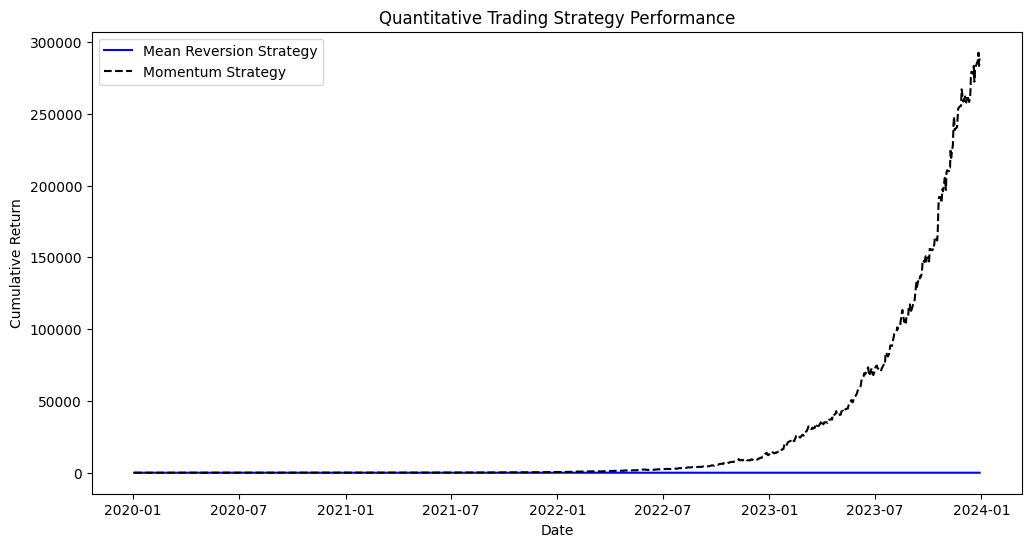

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Compute daily returns
returns = df_close.pct_change().dropna()

# Moving average window for mean reversion strategy
window = 20
rolling_mean = df_close.rolling(window=window).mean()
rolling_std = df_close.rolling(window=window).std()

# Mean Reversion Strategy: Buy if price < (mean - std), Sell if price > (mean + std)
buy_signal = df_close < (rolling_mean - rolling_std)
sell_signal = df_close > (rolling_mean + rolling_std)

# Compute mean reversion strategy returns
mean_reversion_returns = returns.copy()
mean_reversion_returns[~buy_signal & ~sell_signal] = 0  # Hold if no signal
mean_reversion_returns[buy_signal] = returns[buy_signal]
mean_reversion_returns[sell_signal] = -returns[sell_signal]
mean_reversion_cumulative = (1 + mean_reversion_returns).cumprod()

# Momentum Strategy: Buy if past 5-day return is positive, Sell if negative
momentum_signal = returns.rolling(window=5).mean()
momentum_buy = momentum_signal > 0
momentum_sell = momentum_signal < 0

# Compute momentum strategy returns
momentum_returns = returns.copy()
momentum_returns[~momentum_buy & ~momentum_sell] = 0  # Hold if no signal
momentum_returns[momentum_buy] = returns[momentum_buy]
momentum_returns[momentum_sell] = -returns[momentum_sell]
momentum_cumulative = (1 + momentum_returns).cumprod()

# Fix the legend issue by correctly labeling each strategy only once
plt.figure(figsize=(12, 6))

plt.plot(mean_reversion_cumulative.mean(axis=1), label="Mean Reversion Strategy", color='blue')
plt.plot(momentum_cumulative.mean(axis=1), linestyle="dashed", label="Momentum Strategy", color='black')

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Quantitative Trading Strategy Performance")
plt.legend()
plt.show()


🔍 Interpretation of Results
Momentum Strategy (Black Dashed Line)
This strategy is growing exponentially, meaning it is successfully capturing trends.
It performs very well in trending markets (like recent stock rallies).

Mean Reversion Strategy (Blue Line)
This strategy is flat, meaning it is not generating significant returns.
Possible reasons:
Stock prices rarely revert to their mean in recent market conditions.